# Análisis del Dataset

In [17]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# tables
interacciones = 'interactions'
items = 'repositories'
users = 'users'

# datasets to dfs
con = sqlite3.connect("datasets/data.db")
df_int = pd.read_sql_query(f"SELECT * FROM {interacciones}", con)
df_items = pd.read_sql_query(f"SELECT * FROM {items}", con)
df_users = pd.read_sql_query(f"SELECT * FROM {users}", con)
con.close()

In [8]:
print("Cantidad de usuarios:", df_users.shape[0])
print("   Cantidad de features por usuario:", df_users.shape[1])
print("Cantidad de repositorios:", df_items.shape[0])
print("   Cantidad de features por repositorio:", df_items.shape[1])
print("Cantidad de interacciones:", df_int.shape[0])


Cantidad de usuarios: 12955
   Cantidad de features por usuario: 12
Cantidad de repositorios: 1181
   Cantidad de features por repositorio: 11
Cantidad de interacciones: 175612


Features del usuario:
 * `id`: nombre del usuario
 * `gh_id`: Id interno de github
 * `name`: Nombre largo
 * `bio`: presentación del usuario (texto libre)
 * `blog`: URL del sitio del usuario
 * `company`: Empresa del usuario (texto libre)
 * `location`: Ubicación
 * `creacion`: Fecha que el usuario se creo en Github
 * `email`: No se usa
 * `following`: Cantidad de usuarios a los que sigue el usuario de la fila
 * `followers`: Cantidad de seguidores que tiene el usuario de la fila
 * `avatar_url`: Enlace al avatar

In [12]:
df_users.drop(columns=["email"]).head()

,id,gh_id,name,bio,blog,company,location,creacion,following,followers,avatar_url
0,mrry,192142,Derek Murray,None,http://mrry.github.io/,None,"San Francisco, CA",2010-01-29 08:56:23,9,593,https://avatars.githubusercontent.com/u/192142...
1,danbri,170265,Dan Brickley,"I work at Google, with responsibility for Sche...",https://danbri.org/,"@google (datacommons.org, schema.org)",London,2009-12-20 22:42:23,0,0,https://avatars.githubusercontent.com/u/170265...
2,rockt,1196835,Tim Rocktäschel,"Professor of Artificial Intelligence at UCL, O...",rockt.github.io,"Google DeepMind, University College London",London,2011-11-15 14:47:35,105,464,https://avatars.githubusercontent.com/u/119683...
3,petro-rudenko,1121987,Peter Rudenko,None,None,@Nvidia,None,2011-10-12 10:09:20,23,113,https://avatars.githubusercontent.com/u/112198...
4,kashif,8100,Kashif Rasul,Principal Research Scientist working on Deep L...,None,None,"Berlin, Germany",2008-04-21 20:18:07,118,712,https://avatars.githubusercontent.com/u/8100?v=4


Features de los repositorios:
 * `id`: identificador del repositorio
 * `es_fork`: boolean si es un fork o repo original. No se usó.
 * `forks`: cantidad de forks del repositorio
 * `stars`: cantidad de likes del repositorio
 * `watchers`: identico a `stars`
 * `issues`: Cantidad de issues en el repositorio
 * `subscribers`: cantidad de usuarios que estan suscriptos a algún issue.
 * `archived`: si el repo se encuentra archivado. No se usó.
 * `about`: Descripción del repo. No se usó. La idea era armar embeddings para agregar como features.
 * `topics`: Listado de temas del repo separados por coma.
 * `language`: Listado de lenguajes de programación utilizados en el repo. El orden indica propoción de uso decreciente (el primero es el que tiene mas presencia, etc...)

In [13]:
df_items.drop(columns=[]).head()

,id,es_fork,forks,stars,watchers,issues,about,subscribers,archived,topics,language
0,tensorflow/tensorflow,0,88923,177650,177650,2036,An Open Source Machine Learning Framework for ...,7691,0,deep-learning;deep-neural-networks;distributed...,C++;Python;MLIR;Starlark;HTML;Go;C;Java;Jupyte...
1,huggingface/transformers,0,22232,111949,111949,773,🤗 Transformers: State-of-the-art Machine Learn...,1055,0,bert;deep-learning;flax;hacktoberfest;jax;lang...,Python;Cuda;Shell;Dockerfile;C++;C;Makefile;Cy...
2,pytorch/pytorch,0,19475,70824,70824,12679,Tensors and Dynamic neural networks in Python ...,1677,0,autograd;deep-learning;gpu;machine-learning;ne...,Python;C++;Cuda;C;Objective-C++;CMake;Starlark...
3,keras-team/keras,0,19407,59342,59342,375,Deep Learning for humans,1922,0,data-science;deep-learning;machine-learning;ne...,Python;Starlark;Shell;Dockerfile
4,scikit-learn/scikit-learn,0,24658,55841,55841,2251,scikit-learn: machine learning in Python,2155,0,data-analysis;data-science;machine-learning;py...,Python;Cython;C++;C;Shell;Makefile;Starlark


# Análisis de null de items y usuarios


Text(95.72222222222221, 0.5, 'Row Index/Observations')

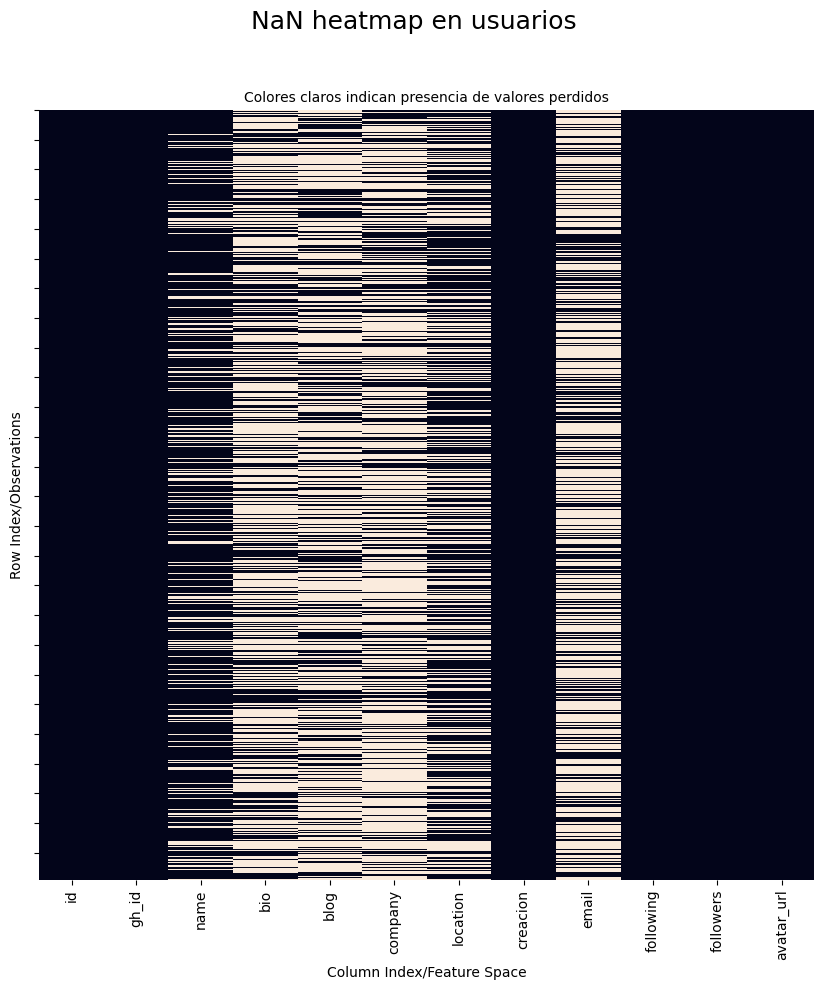

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df_users.isnull(), cbar=False)
plt.suptitle("NaN heatmap en usuarios", fontsize=18)
plt.title("Colores claros indican presencia de valores perdidos", fontsize=10)
plt.yticks(np.arange(0, df_users.shape[0], 500))
plt.xlabel("Column Index/Feature Space")
plt.ylabel("Row Index/Observations")


Text(95.72222222222221, 0.5, 'Row Index/Observations')

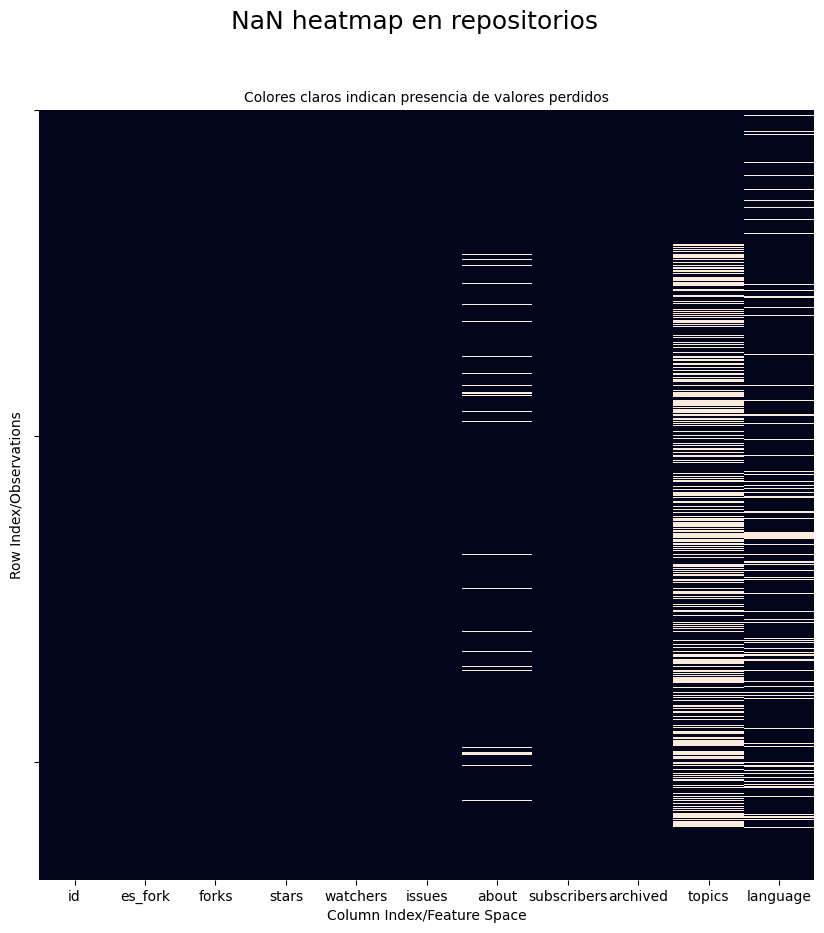

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df_items.isnull(), cbar=False)
plt.suptitle("NaN heatmap en repositorios", fontsize=18)
plt.title("Colores claros indican presencia de valores perdidos", fontsize=10)
plt.yticks(np.arange(0, df_items.shape[0], 500))
plt.xlabel("Column Index/Feature Space")
plt.ylabel("Row Index/Observations")

# Análisis de interacciones presentes

Si bien la fecha de la interacción esta presente, no fue tomada en cuenta en las implementaciones.

Cantidad de interacciones recuperadas: 175.612

In [26]:
df_int.head()

,repository,user,date
0,tensorflow/tensorflow,mrry,2015-11-09 13:17:30
1,tensorflow/tensorflow,danbri,2015-11-09 13:18:49
2,tensorflow/tensorflow,rockt,2015-11-09 13:40:12
3,tensorflow/tensorflow,petro-rudenko,2015-11-09 13:40:58
4,huggingface/transformers,kashif,2018-11-05 15:19:44


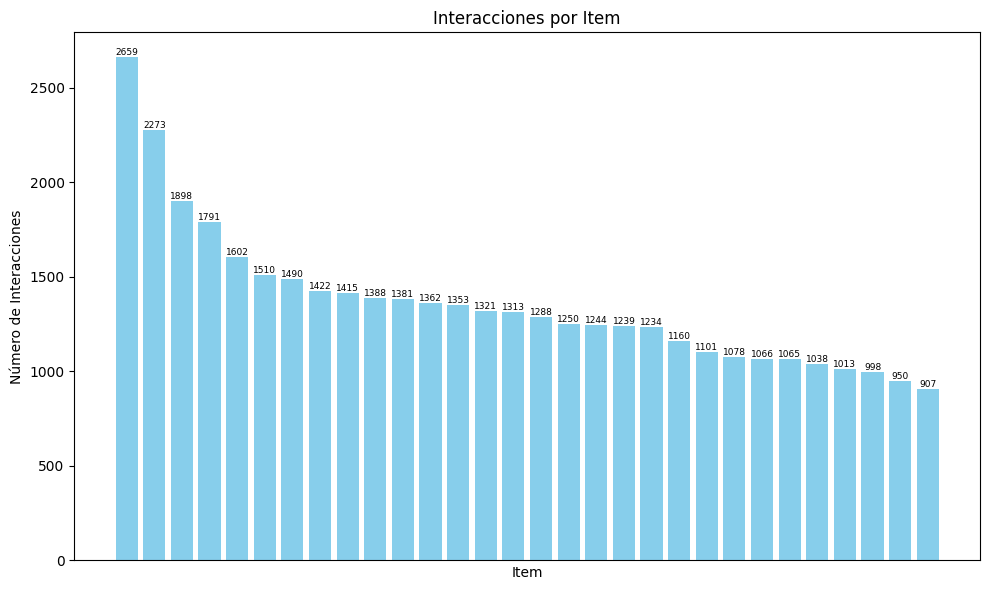

In [38]:
# Calcular la frecuencia de interacciones por item
item_counts = df_int['repository'].value_counts()

# Ordenar el DataFrame por la cantidad de interacciones en orden descendente
item_counts = item_counts.sort_values(ascending=False)
top_items = item_counts.head(30)

# Crear el histograma
plt.figure(figsize=(10, 6))
#item_counts.plot(kind='bar', color='skyblue')
bars = plt.bar(range(len(top_items)), top_items, color='skyblue')
plt.title('Interacciones por Item')
plt.xlabel('Item')
plt.ylabel('Número de Interacciones')
#plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks([])

# Agregar el número encima de cada barra
for bar, count in zip(bars, top_items):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=6.5)

plt.tight_layout()
plt.show()


podemos observar en el plot anterior como desde el item mas popular, la cantidad de interacciones comienza a descender abruptamente, haciendo que en el 30avo ya sea un tercio de la cantidad de interacciones. Este fenomeno responde a una ley de potencia, tipica en escensarios donde se analiza el comportamiento humano

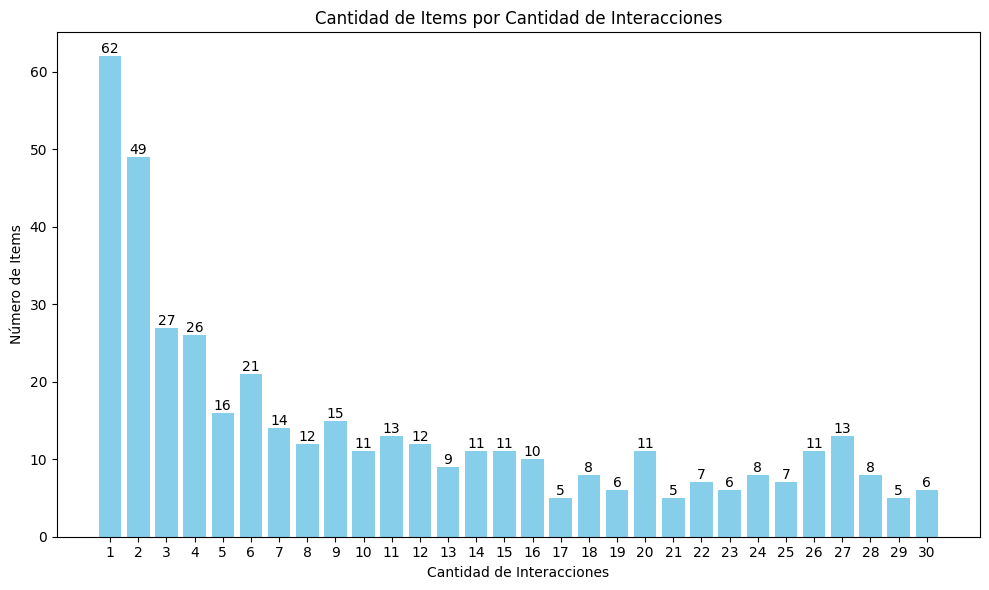

In [47]:
# Calcular la frecuencia de interacciones por item
item_counts = df_int['repository'].value_counts()

# Calcular la frecuencia de cada cantidad de interacciones
interaction_counts = item_counts.value_counts().sort_index()
top_interactions = interaction_counts.head(30)

# Crear el histograma
plt.figure(figsize=(10, 6))
int_bars = plt.bar(top_interactions.index, top_interactions, color='skyblue')
plt.title('Cantidad de Items por Cantidad de Interacciones')
plt.xlabel('Cantidad de Interacciones')
plt.ylabel('Número de Items')
plt.xticks(top_interactions.index)

# Agregar el número encima de cada barra
for bar, count in zip(int_bars, top_interactions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


El plot anterior nos indica, por ejemplo, que existen 62 repositorios que tienen 1 interacción, 49 repositorios que tienen 2 interacciones, etc...